# LEAD SCORING CASE STUDY - (PGDDS - C28)

## BY SEYED JAVIDH & VIVEK CHOWDHURY

### Importing Libraries

In [2]:
#Importing all the necessary libraries.

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

pd.set_option("display.max_columns", 50)

### Reading the DataFrame

In [3]:
#Reading the data into a dataframe.

leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### DataFrame Inspections

In [4]:
#Cheking the number of Rows and Columns.

leads.shape

(9240, 37)

In [5]:
#Checking the descriptive statistics of all the numerical columns.

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking the data types of all the columns.

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Analyzing null values.

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#Understanding the percentage of Null values in the 

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
#Checking for distinct elements.

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## Data Cleaning and Visualization

In [10]:
#Now, we need to check if there are any duplicate rows of information for any lead.
#If it exists, we need to remove the duplicates.

leads.drop_duplicates(subset=['Prospect ID'], inplace=True)

#Checking the shape to see if there were any duplicates present.

leads.shape

(9240, 37)

In [11]:
#Now, it is better to drop all the columns which have only one unique value.

leads= leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                   'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [12]:
#Also,the value "Select" is equivalent to no value provided, so let's go ahead and do that.

leads = leads.replace('Select', np.nan)

In [13]:
#When we observe the percentage of nulls, we take a call to drop columns with 45% or more null values.

col=leads.columns

for i in col:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, 1, inplace = True)

In [14]:
#Checking for null values after dropping those columns with > 45% nulls.

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
#Since Prospect ID and Lead Numbers are not useful for our model building and analysis, it is better to drop them.

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [16]:
#Checking the values of the column: Lead Source.

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
blog                    1
welearnblog_Home        1
youtubechannel          1
testone                 1
Name: Lead Source, dtype: int64

In [17]:
#Here we can see a lot of values with low occurances, so it is better to club them together.

leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','NC_EDM','testone','youtubechannel',
                                                     'Pay per Click Ads','welearnblog_Home','WeLearn','blog','Facebook','Social Media'] ,'Others')

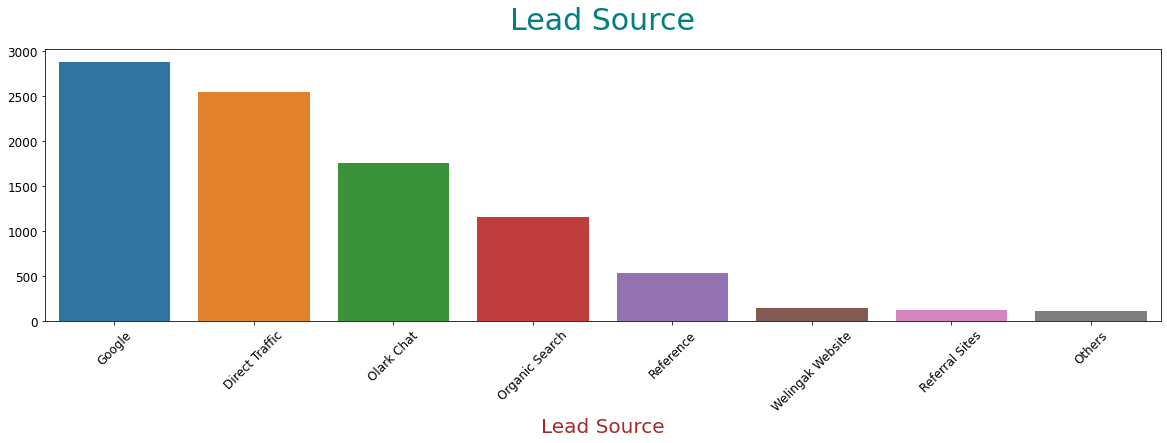

In [18]:
#Visualizing the data from this column:

plt.figure(figsize=[20,5])

sns.barplot(x=leads['Lead Source'].value_counts().index, 
            y=leads['Lead Source'].value_counts().values).set_title("Lead Source", fontsize=30, color='Teal', pad = 20)

plt.xlabel('Lead Source', fontsize= 20, color='Brown')
plt.xticks(rotation=45, size = 12)
plt.yticks(size = 12)

plt.show()

##### **`INFERENCE`** 

- From the above graph we can see that most of the lead had come from Google or a result of Direct Traffic (directly typing in the URL)
- It is also worth noticing that the 3rd place is occupied by leads coming from Olark chat rather than Organic Search.

In [19]:
#Checking the values of the column: Last Activity.

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [20]:
#Here we can see a lot of values with low occurances, so it is better to club them together.

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Received',
                                                         'Email Marked Spam','View in browser link Clicked',
                                                         'Approached upfront','Had a Phone Conversation','Unsubscribed','Unreachable'] ,'Others')

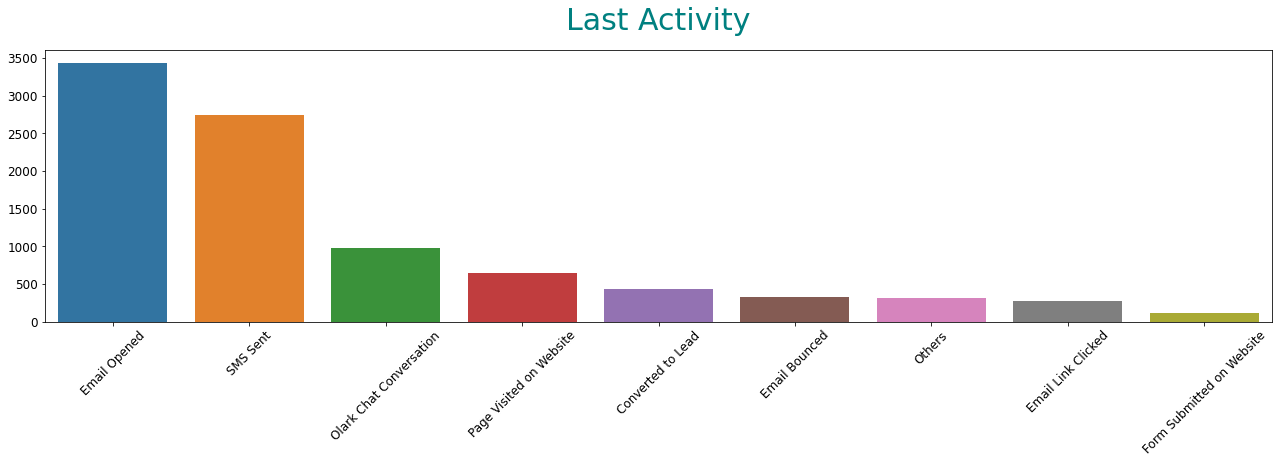

In [21]:
#Visualizing the data from this column:

plt.figure(figsize=[22,5])

sns.barplot(x=leads['Last Activity'].value_counts().index, 
            y=leads['Last Activity'].value_counts().values).set_title("Last Activity", fontsize=30, color='Teal', pad = 20)


plt.xticks(rotation=45, size = 12)
plt.yticks(size = 12)

plt.show()

##### **`INFERENCE`**

- Here, we can notice that most of the leads had opened their email to check the news about X Education.
- Followed by sending SMS and Olark Chat conversation.
- We can also see that a very less population of leads had either clicked on the email link or submitted the form on the website.

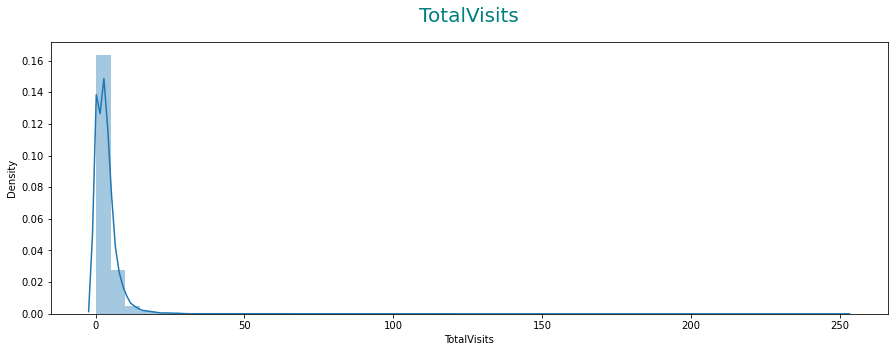

In [22]:
# Checking how skewed the data in the column(TotalVisits) is:

plt.figure(figsize=[15,5])

sns.distplot(leads['TotalVisits']).set_title("TotalVisits", fontsize=20, color='Teal', pad=20)
plt.show()

In [23]:
#Futher checking if there are any null values in the column: TotalVisits.

print("Percentage of nulls: " + str(round(leads.TotalVisits.isnull().sum()/len(leads.TotalVisits),2)))

Percentage of nulls: 0.01


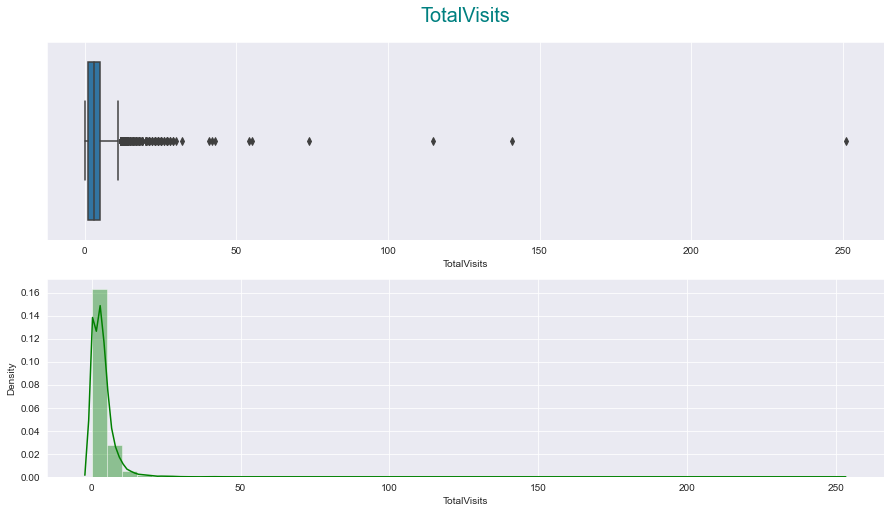

In [24]:
#Checking the: TotalVisits column.

plt.figure(figsize=[15,8])

sns.set_style('darkgrid')

plt.subplot(2,1,1)
sns.boxplot(leads['TotalVisits']).set_title("TotalVisits", fontsize=20, color='Teal', pad=20)

plt.subplot(2,1,2)
sns.distplot(leads['TotalVisits'], color='g')

plt.show()

##### **`INFERENCE`**

- If we observe the boxplot we can see that the there are definitely some outliers in the range of 250. It show that people are visiting the page for 250 times.
- It can also be observed from the histogram that most of the visits are in the range of 0 to 25. There are very less leads who have visited the page for more than 25 times.

In [25]:
#Checking the percentile values of the TotalVisits Column

leads.describe(percentiles = [0.05, 0.5, 0.75, 0.90, 0.95, 0.98, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
98%,1.000000,13.000000,1734.000000,8.000000


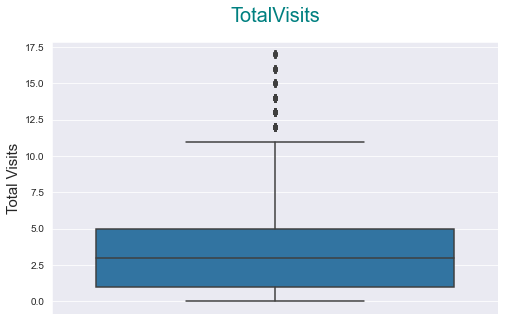

In [26]:
#Since in the TotalVisits column, we can see that there is a huge jump from 99th percentile to the max. And also below 5,
#we are removing the top 1 percentile and the bottom 5 percentile.

plt.figure(figsize=[8,5])

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.05)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits']).set_title("TotalVisits", fontsize=20, color='Teal', pad=20)
plt.ylabel("Total Visits",size = 15)
plt.show()

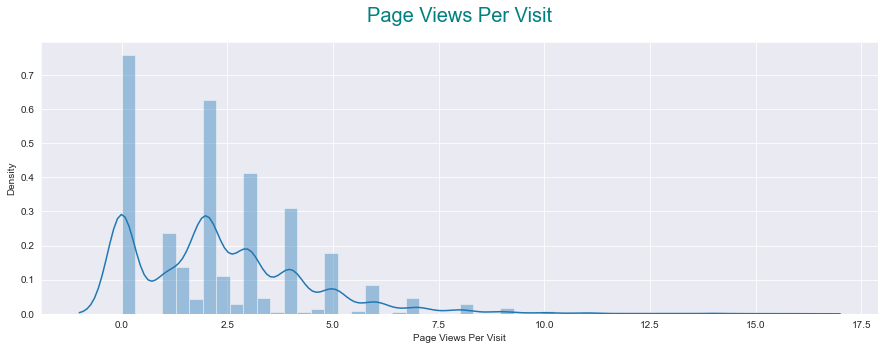

In [27]:
# Checking how skewed the data in the column(Page Views Per Visit) is:

plt.figure(figsize=[15,5])

sns.distplot(leads['Page Views Per Visit']).set_title("Page Views Per Visit", fontsize=20, color='Teal', pad=20)
plt.show()

In [28]:
#Futher checking if there are any null values in the column: Page Views Per Visit.

print("Percentage of nulls: " + str(round(leads['Page Views Per Visit'].isnull().sum()/len(leads['Page Views Per Visit']),2)))

Percentage of nulls: 0.0


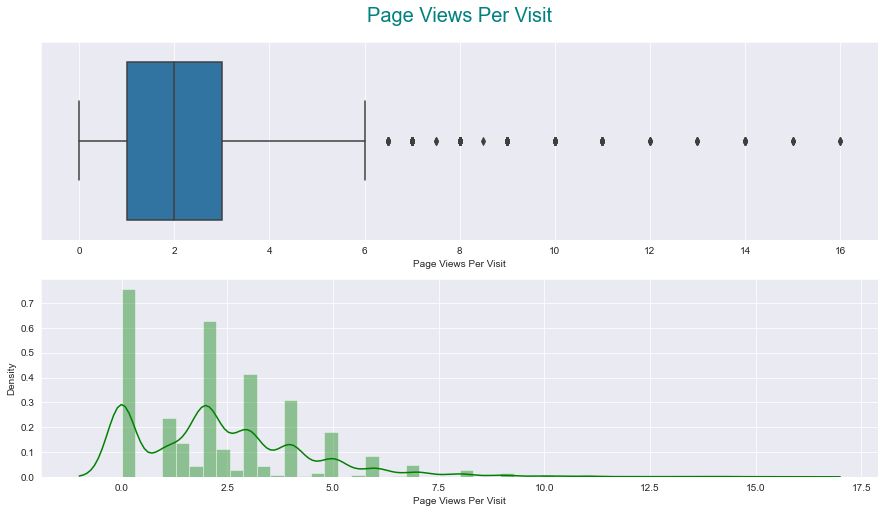

In [29]:
# Checking the Page Views Per Visit column

plt.figure(figsize=[15,8])

plt.subplot(2,1,1)
sns.boxplot(leads['Page Views Per Visit']).set_title("Page Views Per Visit", fontsize=20, color='Teal', pad=20)

plt.subplot(2,1,2)
sns.distplot(leads['Page Views Per Visit'], color='g')

plt.show()

##### **`INFERENCE`** 

- From the boxplot we can definitely see that there are outliers in the data.
- And on the other hand, from the histogram we can see that the data is definitely skewed. With most of the data near the 0 to 10 bin.

In [30]:
#Checking the percentile values of the Page Views Per Visit column

leads.describe(percentiles = [0.05, 0.5, 0.75, 0.90, 0.95, 0.98, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9020.000000,9020.000000,9020.000000,9020.000000
mean,0.379712,3.206984,479.759534,2.337271
std,0.485342,2.990108,544.688157,2.062363
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,243.000000,2.000000
75%,1.000000,5.000000,915.250000,3.000000
90%,1.000000,7.000000,1371.000000,5.000000
95%,1.000000,9.000000,1554.050000,6.000000
98%,1.000000,12.000000,1725.620000,8.000000


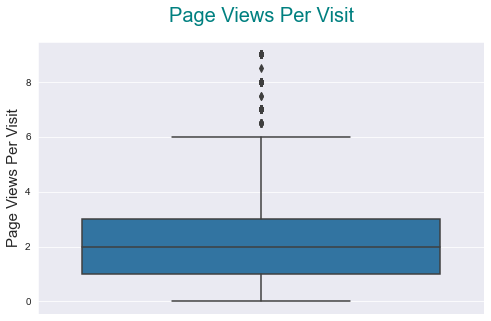

In [31]:
#Since in the Page Views Per Visit column, we can see that there is a huge jump from 99th percentile to the max. And also below 5,
#we are removing the top 1 percentile and the bottom 5 percentile.

plt.figure(figsize=[8,5])

Q3 = leads["Page Views Per Visit"].quantile(0.99)
leads = leads[(leads["Page Views Per Visit"] <= Q3)]
Q1 = leads.TotalVisits.quantile(0.05)
leads = leads[(leads["Page Views Per Visit"] >= Q1)]
sns.boxplot(y=leads["Page Views Per Visit"]).set_title("Page Views Per Visit", fontsize=20, color='Teal', pad=20)
plt.ylabel("Page Views Per Visit",size = 15)
plt.show()

In [32]:
#Checking for all the values and their occurances in the column: Country.

leads['Country'].value_counts(dropna=False)

India                   6347
NaN                     2323
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
Nigeria                    4
unknown                    4
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Sweden                     3
Belgium                    2
Asia/Pacific Region        2
China                      2
Ghana                      2
Philippines                2
Bangladesh                 2
Italy                      2
Uganda                     2
Netherlands                1
Tanzania                   1
Liberia                    1
Vietnam                    1
Russia                     1
Denmark                    1
Sri Lanka     

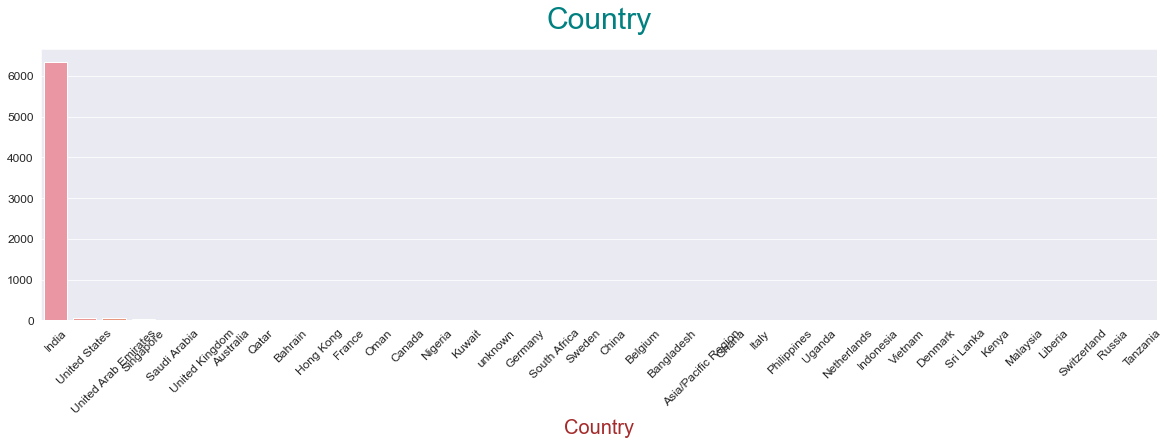

In [33]:
#Visualizing the Country column.

plt.figure(figsize=[20,5])

sns.barplot(x=leads['Country'].value_counts().index, 
            y=leads['Country'].value_counts().values).set_title("Country", fontsize=30, color='Teal', pad = 20)

plt.xlabel('Country', fontsize= 20, color='Brown')
plt.xticks(rotation=45, size = 12)
plt.yticks(size = 12)

plt.show()

##### **`INFERENCE`**

- Since the column, country is highly dominated by the value of India, it is best to leave it out of our model.
- Dropping this column will be best.

In [34]:
#Dropping the Country column.

leads.drop(columns = "Country", inplace = True)

In [35]:
#Checking for all the values and their occurances in the column: Specialization.

leads['Specialization'].value_counts(dropna=False)

NaN                                  3284
Finance Management                    945
Human Resource Management             820
Marketing Management                  815
Operations Management                 495
Business Administration               390
IT Projects Management                360
Supply Chain Management               338
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
Healthcare Management                 151
E-COMMERCE                            107
Hospitality Management                107
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [36]:
#Here, we can see that the NaN values occur 3x that of the 2nd highest value in this column. So we create a new category here.

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Unknown')

In [37]:
# We also notice that there are several Management related Specializations, Hence we can have a single bin for them.

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management'
                                                           ,'Operations Management','IT Projects Management','Supply Chain Management',
                                                         'Healthcare Management','Hospitality Management','Retail Management'],'Management Specialization')

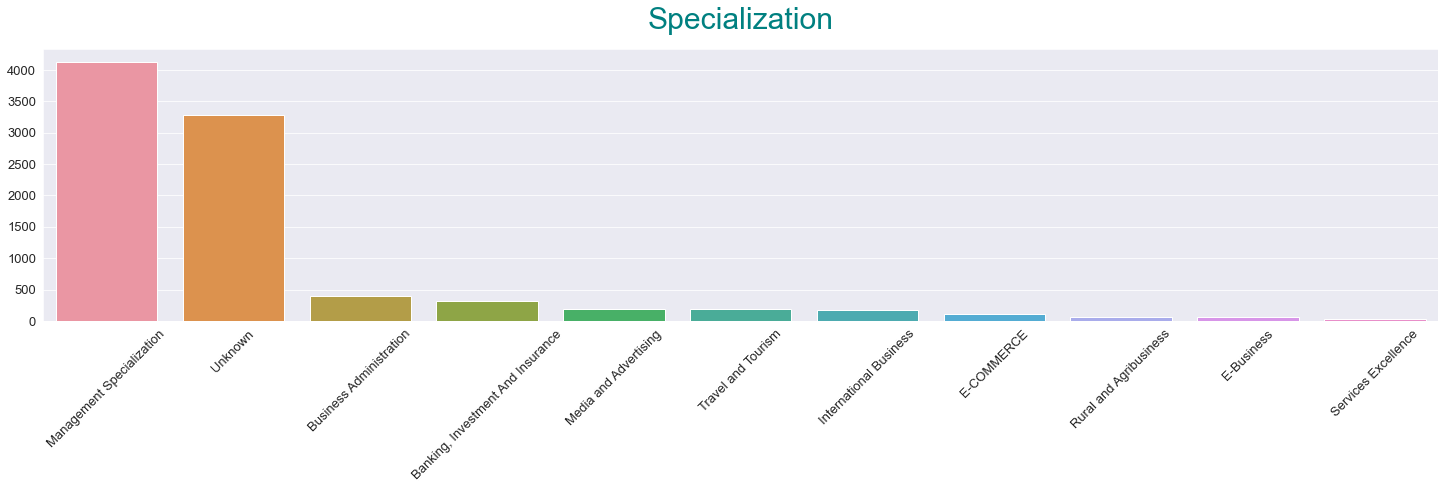

In [38]:
#Visualizing the "Specialization" column.

plt.figure(figsize=[25,5])

sns.barplot(x=leads['Specialization'].value_counts().index, 
            y=leads['Specialization'].value_counts().values).set_title("Specialization", fontsize=30, color='Teal', pad = 20)

plt.xticks(rotation=45, size = 13)
plt.yticks(size = 13)

plt.show()

##### **`INFERENCE`** 

- From the above bar graph, we can see that people with specialization in Management domains are the most common visitors. 
- However, people from Rural and Agricultural, E-Business and Services Excellence are among the least visited people.

In [39]:
#Checking for all the values and their occurances in the column: "What is your current occupation".

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5410
NaN                     2643
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [40]:
#Since the occurance of Housewife and Businessman is less than others, we can bin them together with Others.

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Housewife','Businessman','Other'] ,'Others')

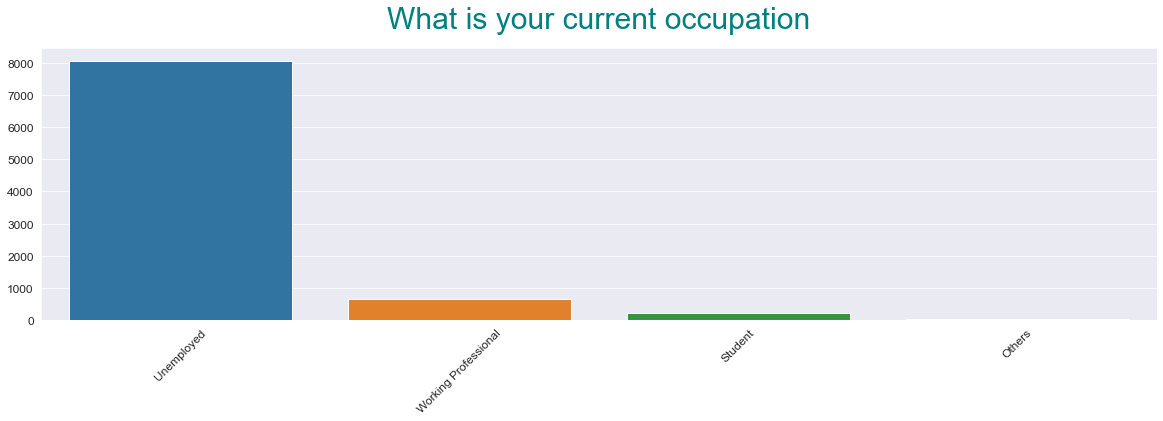

In [41]:
#Visualizing the "What is your current occupation" column.

plt.figure(figsize=[20,5])

sns.barplot(x=leads['What is your current occupation'].value_counts().index, 
            y=leads['What is your current occupation'].value_counts().values).set_title("What is your current occupation", 
                                                                                        fontsize=30, color='Teal', pad = 20)

plt.xticks(rotation=45, size = 12)
plt.yticks(size = 12)

plt.show()

##### **`INFERENCE`**

- Here we can observe that most of the audience belong are unemployed with a very tiny proportion of people who are working or studying.

In [42]:
#Checking for all the values and their occurances in the column: "What matters most to you in choosing a course".

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6290
NaN                          2661
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [43]:
#Imputing the NaN values with Better Career Prospects

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

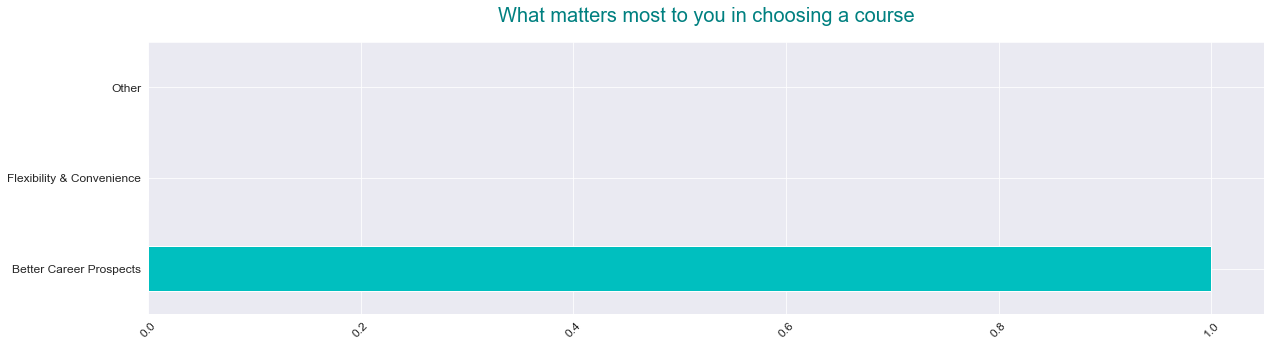

In [44]:
#Visualizing the "What matters most to you in choosing a course" column.

plt.figure(figsize=[20,5])

leads['What matters most to you in choosing a course'].value_counts(normalize=True).plot.barh(color='c').set_title("What matters most to you in choosing a course", 
                                                                                            fontsize=20, color='Teal', pad=20)

plt.xticks(rotation=45, size = 12)
plt.yticks(size = 12)


plt.show()

##### **`INFERENCE`**

- The above Bar graph concludes that most of the people are looking for Better Career Prospects.
- But since this value is highly dominated by just one value, we can drop this column.

In [45]:
#Dropping the "What matters most to you in choosing a course" column:

leads.drop(columns = 'What matters most to you in choosing a course', axis=1, inplace=True)

In [46]:
#Checking for all the values and their occurances in the column: "Tags".

leads['Tags'].value_counts(dropna=False)

NaN                                                  3284
Will revert after reading the email                  2002
Ringing                                              1162
Interested in other courses                           505
Already a student                                     461
Closed by Horizzon                                    290
switched off                                          237
Busy                                                  183
Lost to EINS                                          169
Not doing further education                           137
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         81
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    26
in touch with 

In [47]:
#Since the occurance of anything below 100 is less, we can bin them together with Others.

leads['Tags'] = leads['Tags'].replace(np.nan, 'Unknown')
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number','wrong number given',
                                       'Interested  in full time MBA'] ,'Other_Reasons')

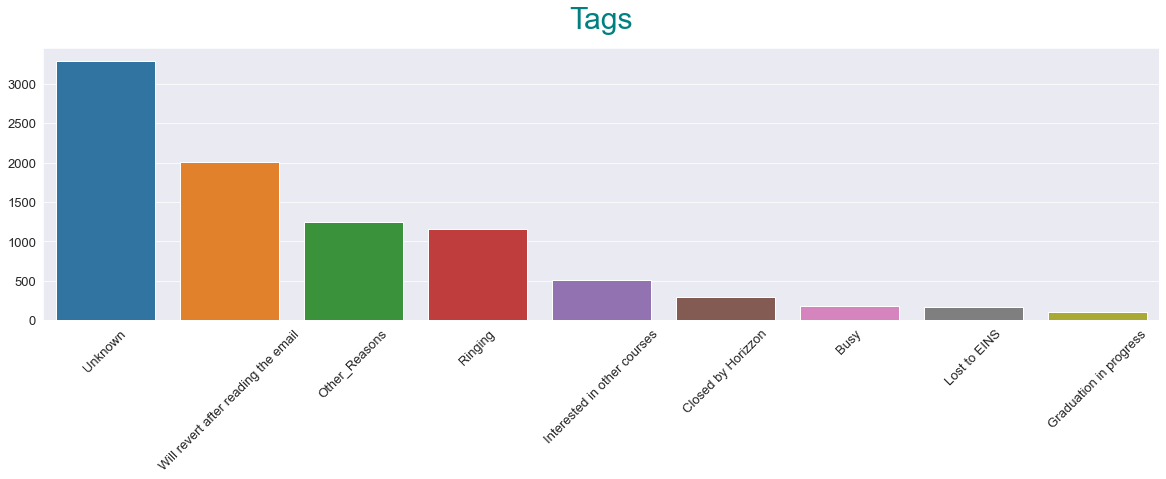

In [48]:
#Visualizing the "Tags" column.

plt.figure(figsize=[20,5])

sns.barplot(x=leads['Tags'].value_counts().index, 
            y=leads['Tags'].value_counts().values).set_title("Tags", fontsize=30, color='Teal', pad = 20)

plt.xticks(rotation=45, size=13)
plt.yticks(size=13)

plt.show()

In [49]:
#Checking for all the values and their occurances in the column: "City".

leads['City'].value_counts(dropna=False)

NaN                            3578
Mumbai                         3109
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [50]:
#Imputing the value of NaN as Mumbai here.

leads['City'] = leads['City'].replace(np.nan,'Mumbai')

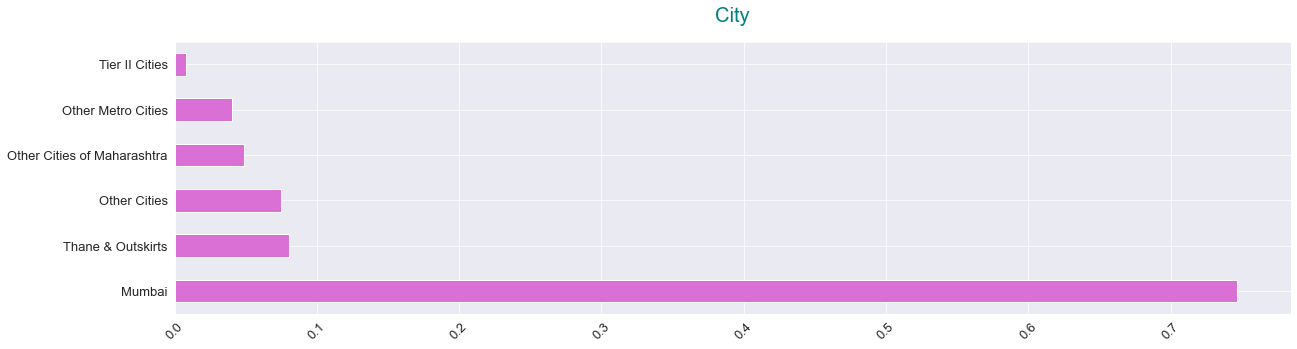

In [51]:
#Visualizing the column: City.

plt.figure(figsize=[20,5])

leads['City'].value_counts(normalize=True).plot.barh(color='orchid').set_title("City", fontsize=20, color='Teal', pad=20)

plt.xticks(rotation=45, size=13)
plt.yticks(size=13)

plt.show()

In [52]:
#Since this column is also highly dominated by one single value, it is better to drop this column.

leads.drop(columns = 'City', axis=1, inplace=True)

In [53]:
#Checking if any more null values exist in the dataframe.

leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [54]:
#Checking for all the values and their occurances in the column: "Lead Origin".

leads['Lead Origin'].value_counts()

Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64

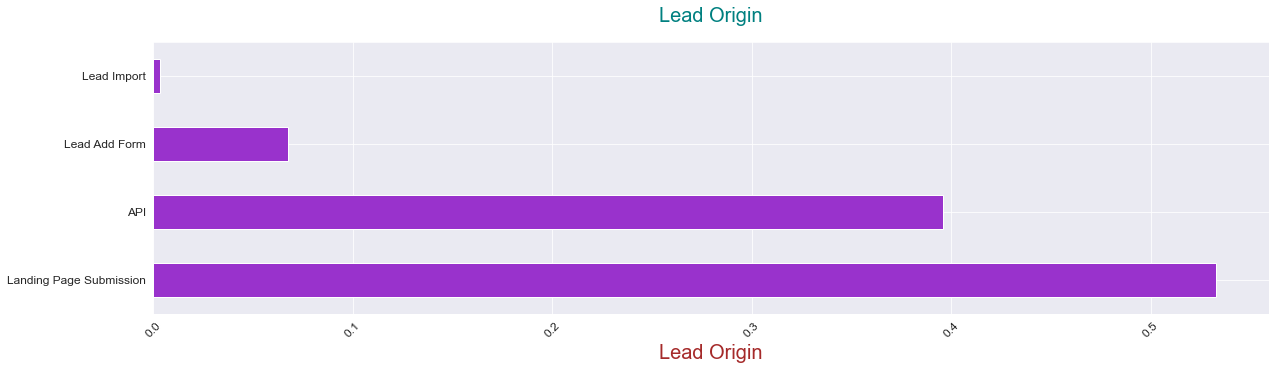

In [55]:
#VALUE COUNTS IN GRAPH 

plt.figure(figsize=[20,5])

leads['Lead Origin'].value_counts(normalize=True).plot.barh(color='darkorchid').set_title("Lead Origin", fontsize=20, 
                                                                                          color='Teal', pad=20)

plt.xlabel('Lead Origin', fontsize= 20, color='Brown')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)

plt.show()

##### **`INFERENCE`** 

- We can observe that most of the leads are from the landing page and the API.

In [56]:
#Checking for all the values and their occurances in the column: "Do Not Email".

leads['Do Not Email'].value_counts()

No     8256
Yes     697
Name: Do Not Email, dtype: int64

In [57]:
#Checking for all the values and their occurances in the column: "Do Not Call".

leads['Do Not Call'].value_counts()

No     8951
Yes       2
Name: Do Not Call, dtype: int64

In [58]:
#Checking for all the values and their occurances in the column: "Search".

leads['Search'].value_counts()

No     8940
Yes      13
Name: Search, dtype: int64

In [59]:
#Checking for all the values and their occurances in the column: "Newspaper Article".

leads['Newspaper Article'].value_counts()

No     8952
Yes       1
Name: Newspaper Article, dtype: int64

In [60]:
#Checking for all the values and their occurances in the column: "X Education Forums".

leads['X Education Forums'].value_counts()

No    8953
Name: X Education Forums, dtype: int64

In [61]:
#Checking for all the values and their occurances in the column: "Newspaper".

leads['Newspaper'].value_counts()

No     8952
Yes       1
Name: Newspaper, dtype: int64

In [62]:
#Checking for all the values and their occurances in the column: "Digital Advertisement".

leads['Digital Advertisement'].value_counts()

No     8950
Yes       3
Name: Digital Advertisement, dtype: int64

In [63]:
#Checking for all the values and their occurances in the column: "Through Recommendations".

leads['Through Recommendations'].value_counts()

No     8947
Yes       6
Name: Through Recommendations, dtype: int64

In [64]:
#Since, for the above columns, we can observe that they are usually dominated by a single entity, it is best to drop them.

cols = ['Do Not Email','Do Not Call','Search','Newspaper Article','Digital Advertisement','Through Recommendations','X Education Forums','Newspaper']

leads.drop(columns=cols, axis=1, inplace=True)

In [65]:
#Checking for all the values and their occurances in the column: "Converted".

leads['Converted'].value_counts()

0    5558
1    3395
Name: Converted, dtype: int64

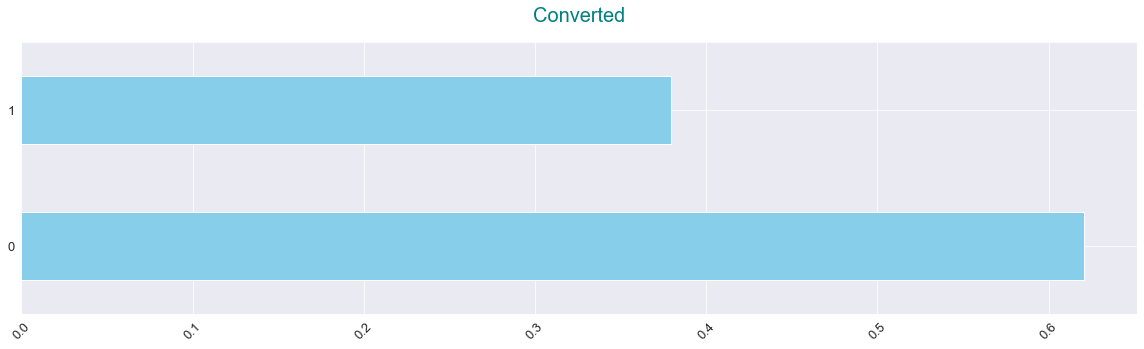

In [66]:
#Visualizing the column: Converted.

plt.figure(figsize=[20,5])

leads['Converted'].value_counts(normalize=True).plot.barh(color='skyblue').set_title("Converted", fontsize=20,
                                                                                          color='Teal', pad=20)

plt.xticks(rotation=45, size=13)
plt.yticks(size=13)

plt.show()

##### **`INFERENCE`** 

- Here we can see that there are almost 38% of candidates getting converted.
- But a majority of more than 60% are not converted

In [67]:
#Checking for any imbalance in the Converted column.

converted = leads[leads['Converted'] == 1].shape[0]
non_converted = leads[leads['Converted'] != 1].shape[0]

# the ratio of converted to non_converted is:

ratio = float(converted / non_converted)

if ratio > 0.95:
    print("The data is imbalanced.")
else:
    print("The data is balanced.")

The data is balanced.


In [68]:
#Checking for all the values and their occurances in the column: "Total Time Spent on Website".

leads['Total Time Spent on Website'].value_counts().head()

0      2193
60       19
75       18
127      18
234      17
Name: Total Time Spent on Website, dtype: int64

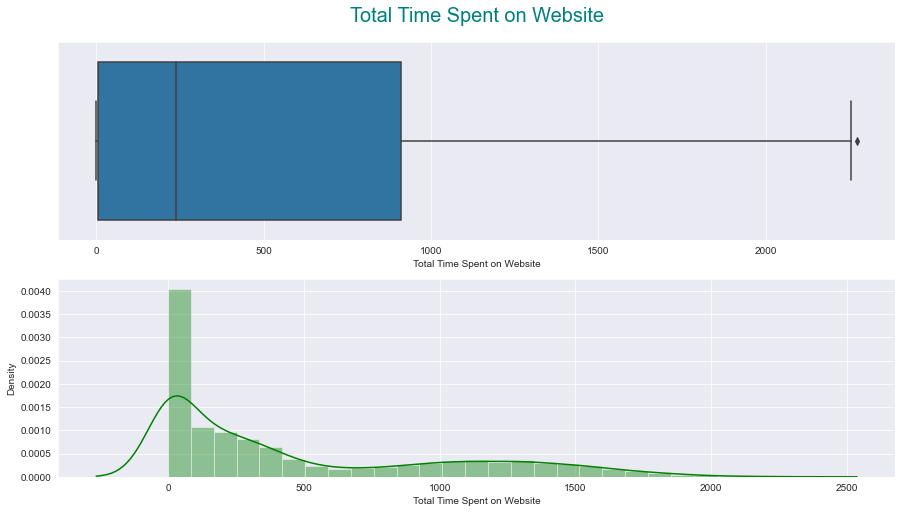

In [69]:
# Visualizing the column: "Total Time Spent on Website"

plt.figure(figsize=[15,8])

plt.subplot(2,1,1)
sns.boxplot(leads['Total Time Spent on Website']).set_title("Total Time Spent on Website", fontsize=20, color='Teal', pad=20)

plt.subplot(2,1,2)
sns.distplot(leads['Total Time Spent on Website'], color='g')

plt.show()

##### **`INFERENCE`** 

- Here, we can see from the boxplot that the mostly people spend about 1000 seconds on the website.
- Also, we can see from the histogram that it is skewed and most people spend near about 500 seconds on the website.

In [70]:
#Checking the percentile values of the Total Time Spent on Website column.

leads.describe(percentiles = [0.05, 0.5, 0.75, 0.90, 0.95, 0.98, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8953.000000,8953.000000,8953.000000,8953.000000
mean,0.379203,3.143081,477.736401,2.266858
std,0.485216,2.903799,544.180321,1.895221
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,240.000000,2.000000
75%,1.000000,5.000000,911.000000,3.000000
90%,1.000000,7.000000,1370.000000,5.000000
95%,1.000000,9.000000,1553.000000,6.000000
98%,1.000000,11.000000,1727.920000,7.000000


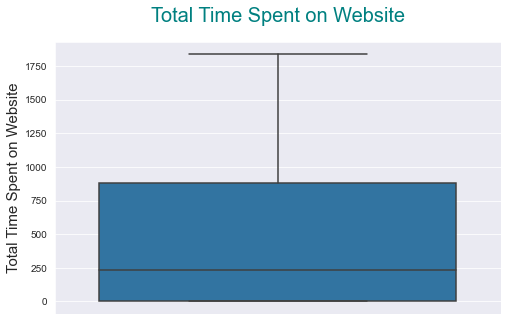

In [71]:
#Since in the Total Time Spent on Website column, we can see that there is a huge jump from 99th percentile to the max. And also below 5,
#we are removing the top 1 percentile and the bottom 5 percentile.

plt.figure(figsize=[8,5])

Q3 = leads["Total Time Spent on Website"].quantile(0.99)
leads = leads[(leads["Total Time Spent on Website"] <= Q3)]
Q1 = leads.TotalVisits.quantile(0.05)
leads = leads[(leads["Total Time Spent on Website"] >= Q1)]
sns.boxplot(y=leads["Total Time Spent on Website"]).set_title("Total Time Spent on Website", fontsize=20, color='Teal', pad=20)
plt.ylabel("Total Time Spent on Website",size = 15)
plt.show()

In [72]:
#Checking for all the values and their occurances in the column: "A free copy of Mastering The Interview".

leads['A free copy of Mastering The Interview'].value_counts()

No     6102
Yes    2761
Name: A free copy of Mastering The Interview, dtype: int64

In [73]:
#Performing One Hot encoding on the Yes/No values.

leads['A free copy of Mastering The Interview']=leads['A free copy of Mastering The Interview'].map({"No":0,"Yes":1})

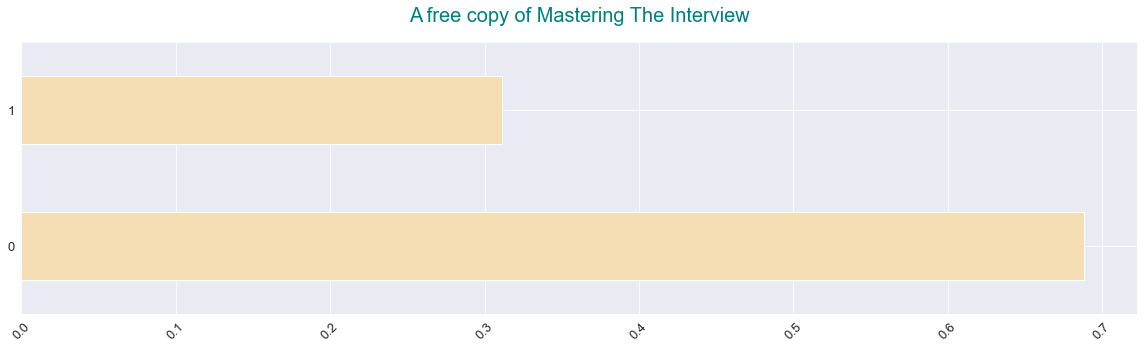

In [74]:
#Visualizing the column: "A free copy of Mastering The Interview"

plt.figure(figsize=[20,5])

leads['A free copy of Mastering The Interview'].value_counts(normalize=True).plot.barh(color='wheat').set_title("A free copy of Mastering The Interview", 
                                                                                                                 fontsize=20, color='Teal', pad=20)

plt.xticks(rotation=45, size=13)
plt.yticks(size=13)

plt.show()

In [75]:
#Checking for all the values and their occurances in the column: "Last Notable Activity".

leads['Last Notable Activity'].value_counts()

Modified                        3201
Email Opened                    2761
SMS Sent                        2110
Page Visited on Website          287
Olark Chat Conversation          181
Email Link Clicked               169
Email Bounced                     58
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          13
Email Received                     1
View in browser link Clicked       1
Email Marked Spam                  1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [76]:
#Clubbing anything below 100 as "Other_Activities"

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website','Resubscribed to emails','Email Received','Approached upfront','View in browser link Clicked'], 'Other_Activities')

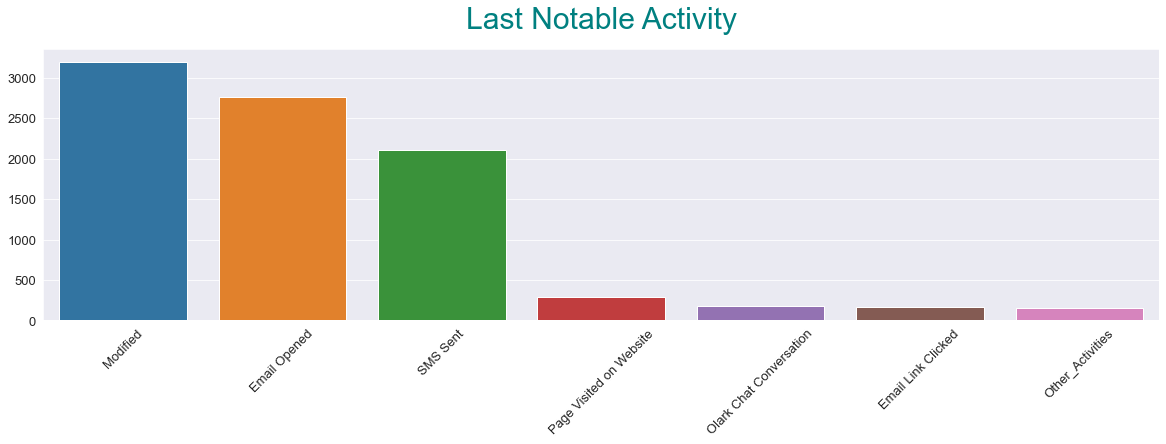

In [77]:
#VALUE COUNTS IN GRAPH 

plt.figure(figsize=[20,5])

sns.barplot(x=leads['Last Notable Activity'].value_counts().index, 
            y=leads['Last Notable Activity'].value_counts().values).set_title("Last Notable Activity", fontsize=30, color='Teal', pad = 20)

plt.xticks(rotation=45, size=13)
plt.yticks(size=13)

plt.show()

##### **`INFERENCE`**

- We can observe from the above bar chart that the last activity of the leads are usually- modification, email opened or sending sms.

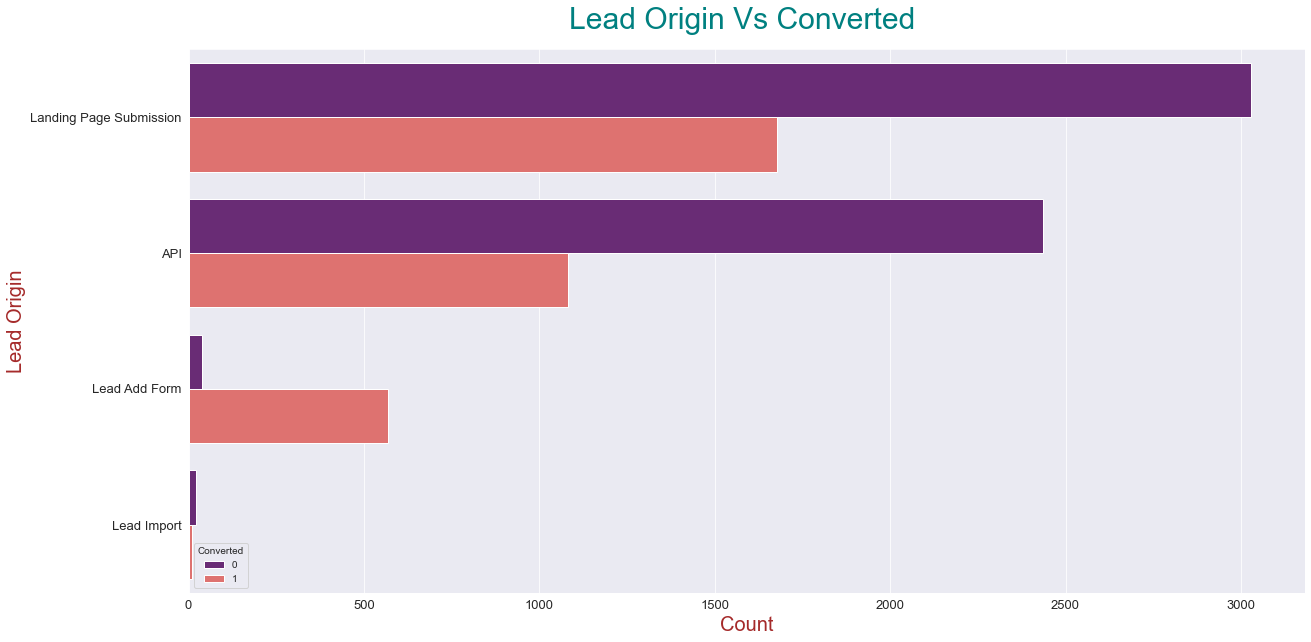

In [78]:
#Lead Origin Vs Converted

plt.figure(figsize=[20,10])

sns.countplot(data = leads, y= 'Lead Origin', order=leads['Lead Origin'].value_counts().index,
              hue = 'Converted',palette='magma').set_title("Lead Origin Vs Converted " ,
                                                                      fontsize=30, color='Teal', pad=20)


plt.ylabel("Lead Origin", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Count", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

##### **`INFERENCE`** 

- Here, we can see that Leads, who's origin is from the Add Form section, are more likely to get converted later on.
- The ratio of Leads converted from the Landing Page Submission and API looks okayish, however not as great as that of Lead Add Form.

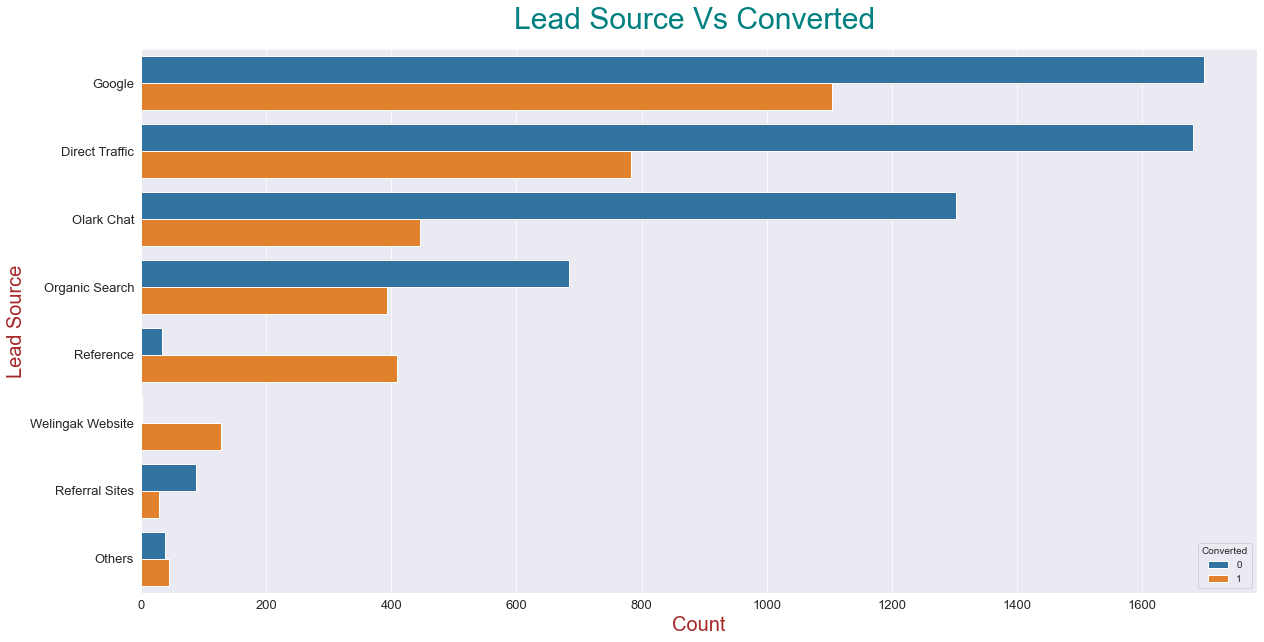

In [79]:
# Lead Source Vs Converted

plt.figure(figsize=[20,10])

sns.countplot(data = leads, y= 'Lead Source', order=leads['Lead Source'].value_counts().index,
              hue = 'Converted').set_title("Lead Source Vs Converted " ,
                                                                      fontsize=30, color='Teal', pad=20)


plt.ylabel("Lead Source", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Count", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

##### **`INFERENCE`**

- From the above graph we can see that Leads who come through refrence or from Wellingak website, or any other sources are more likely to get converted.
- Leads from Google are also quite likely to get converted. 

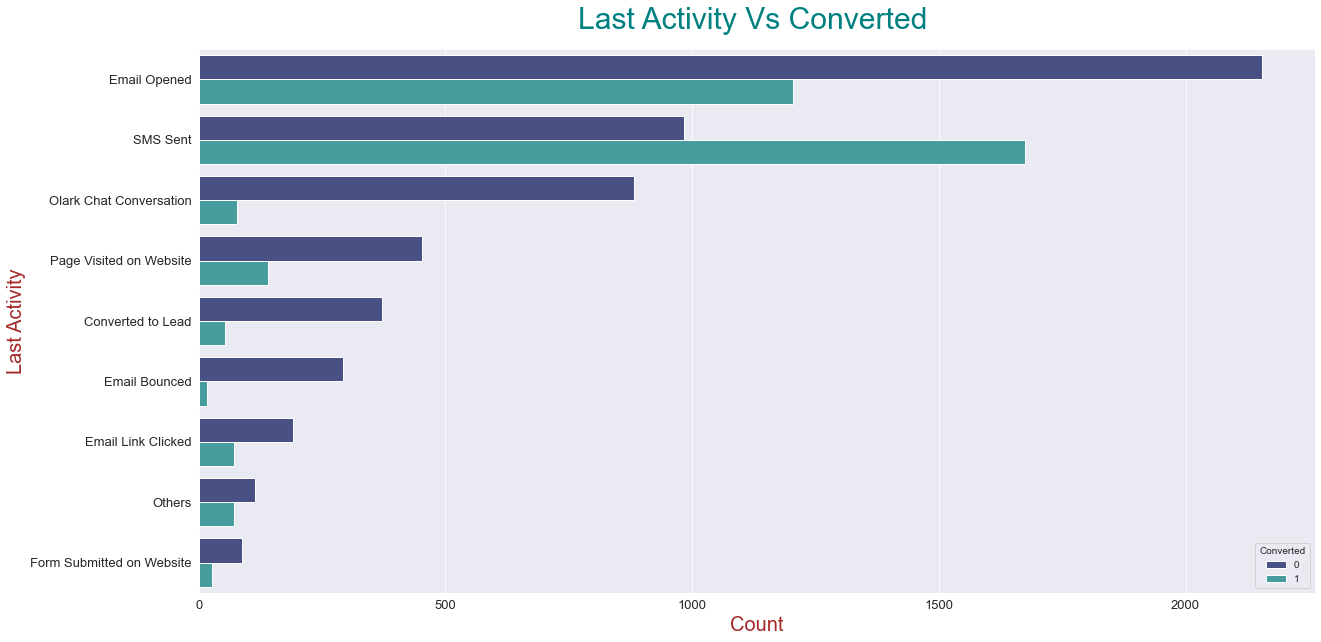

In [80]:
#Last Activity Vs Converted

plt.figure(figsize=[20,10])

sns.countplot(data = leads, y= 'Last Activity', order=leads['Last Activity'].value_counts().index,
              hue = 'Converted',palette='mako').set_title("Last Activity Vs Converted " ,
                                                                      fontsize=30, color='Teal', pad=20)


plt.ylabel("Last Activity", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Count", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

##### **`INFERENCE`**

- Here, we can notice that the Leads who's last activity is sending SMS are really good to target, as they are more likely to get converted.
- However, we should avoid leads who's last activities are- Olark Chat Conversation, Email Bounced or already converted leads.

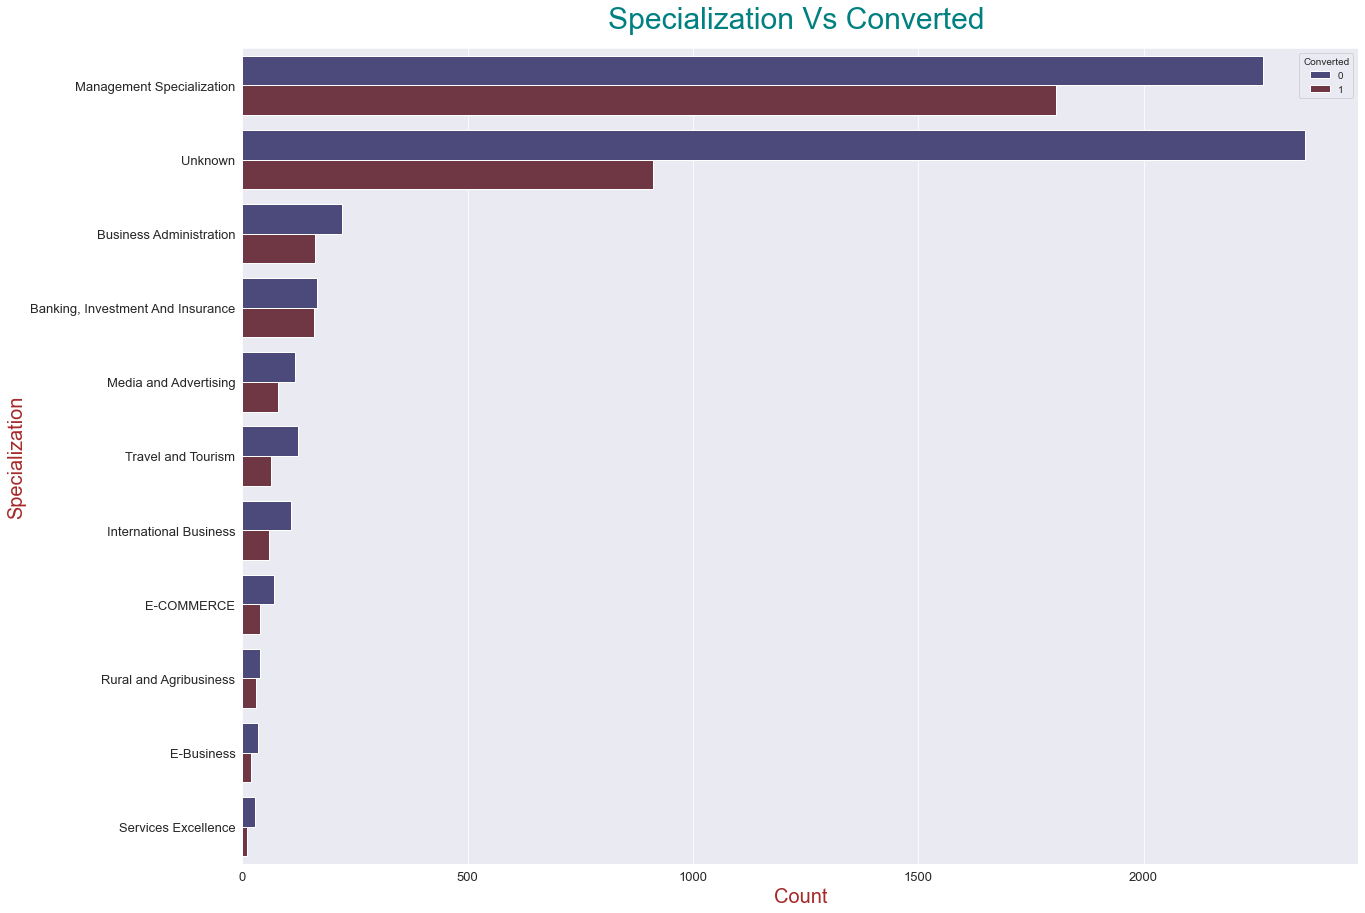

In [81]:
#Specialization Vs Converted

plt.figure(figsize=[20,15])

sns.countplot(data = leads, y= 'Specialization', order=leads['Specialization'].value_counts().index,
              hue = 'Converted',palette='icefire').set_title("Specialization Vs Converted " ,
                                                                      fontsize=30, color='Teal', pad=20)


plt.ylabel("Specialization", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Count", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

##### **`INFERENCE`** 

- From the graph we can understand that leads from Management, Business Administration, Banking inverstment and insurance are more likely to get converted.
- However, people who do not mention their specialization are less likely to be converted.

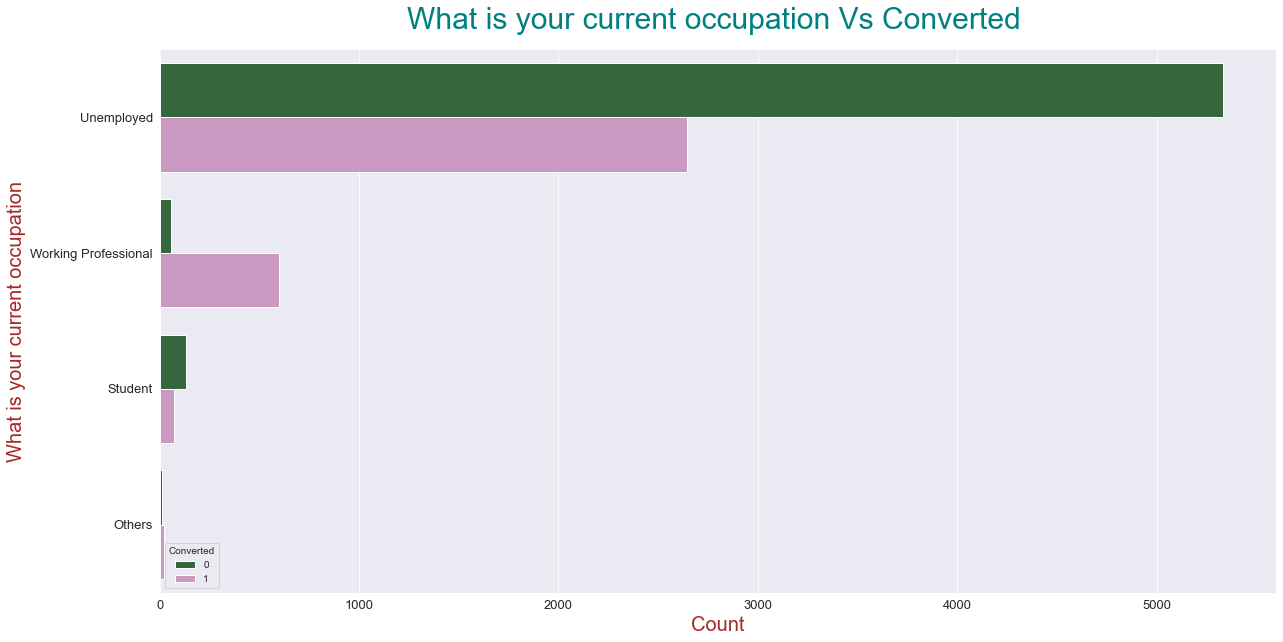

In [82]:
#What is your current occupation Vs Converted

plt.figure(figsize=[20,10])

sns.countplot(data = leads, y= 'What is your current occupation', order=leads['What is your current occupation'].value_counts().index,
              hue = 'Converted',palette='cubehelix').set_title("What is your current occupation Vs Converted " ,
                                                                      fontsize=30, color='Teal', pad=20)


plt.ylabel("What is your current occupation", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Count", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

##### **`INFERENCE`**

- From the bar graph we can clearly see that Leads who are working should be targetted, followed by students.
- Unemployed leads are the worst category to target.

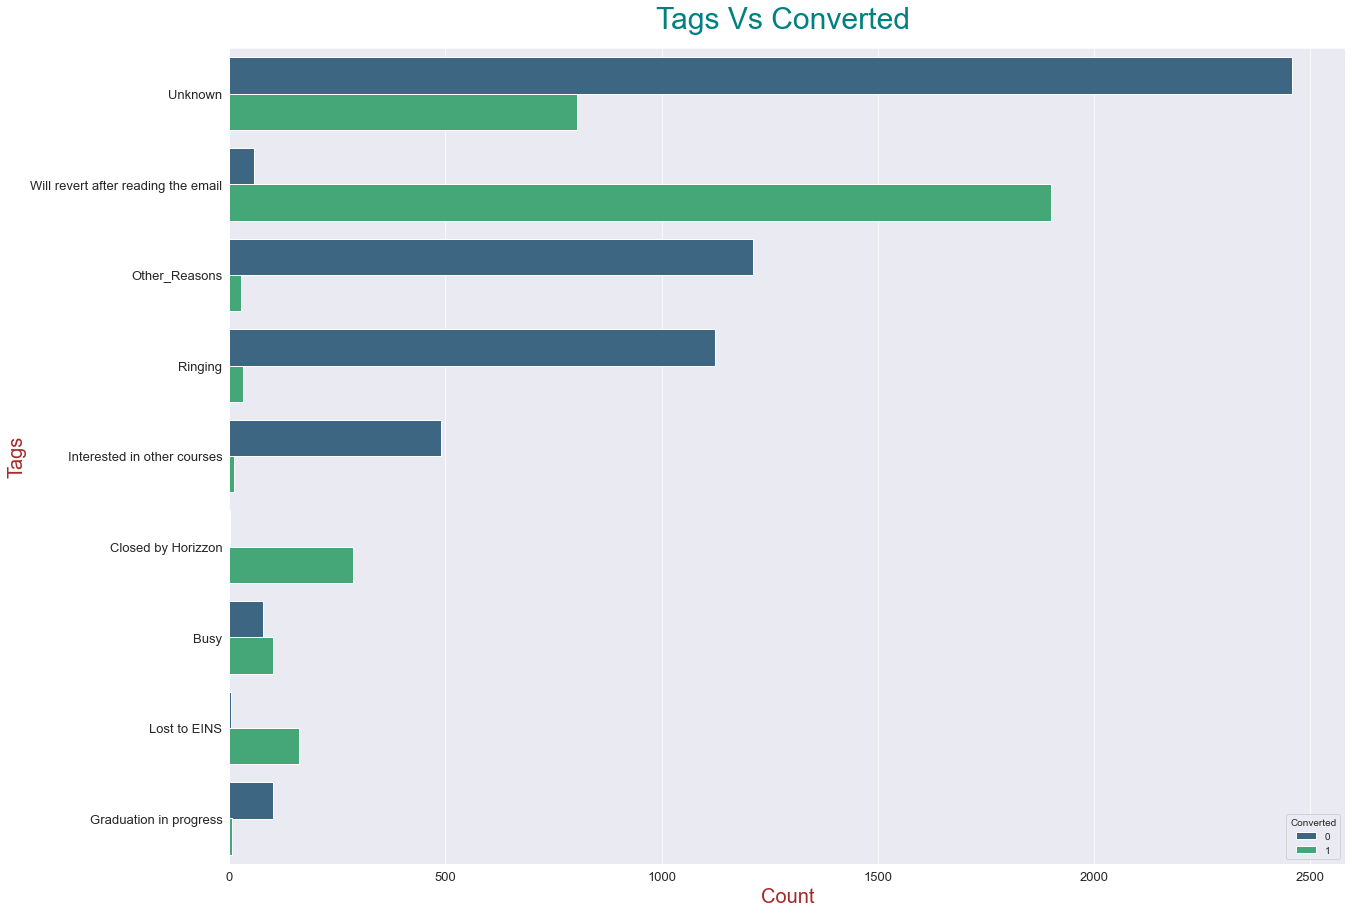

In [83]:
#Tags  Vs Converted

plt.figure(figsize=[20,15])

sns.countplot(data = leads, y= 'Tags', order=leads['Tags'].value_counts().index,
              hue = 'Converted',palette='viridis').set_title("Tags Vs Converted " ,
                                                                      fontsize=30, color='Teal', pad=20)


plt.ylabel("Tags", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Count", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

##### **`INFERENCE`**

- It can be observed from the plot above that Leads who are tagged as "Will revert back after reading the email" are more likely to be converted followed by "Closed by Horizzon" and "Lost to EINS".
- Leads who are still graduating, interested in other course or their phone ringing and not picking up are less likely to get converted.

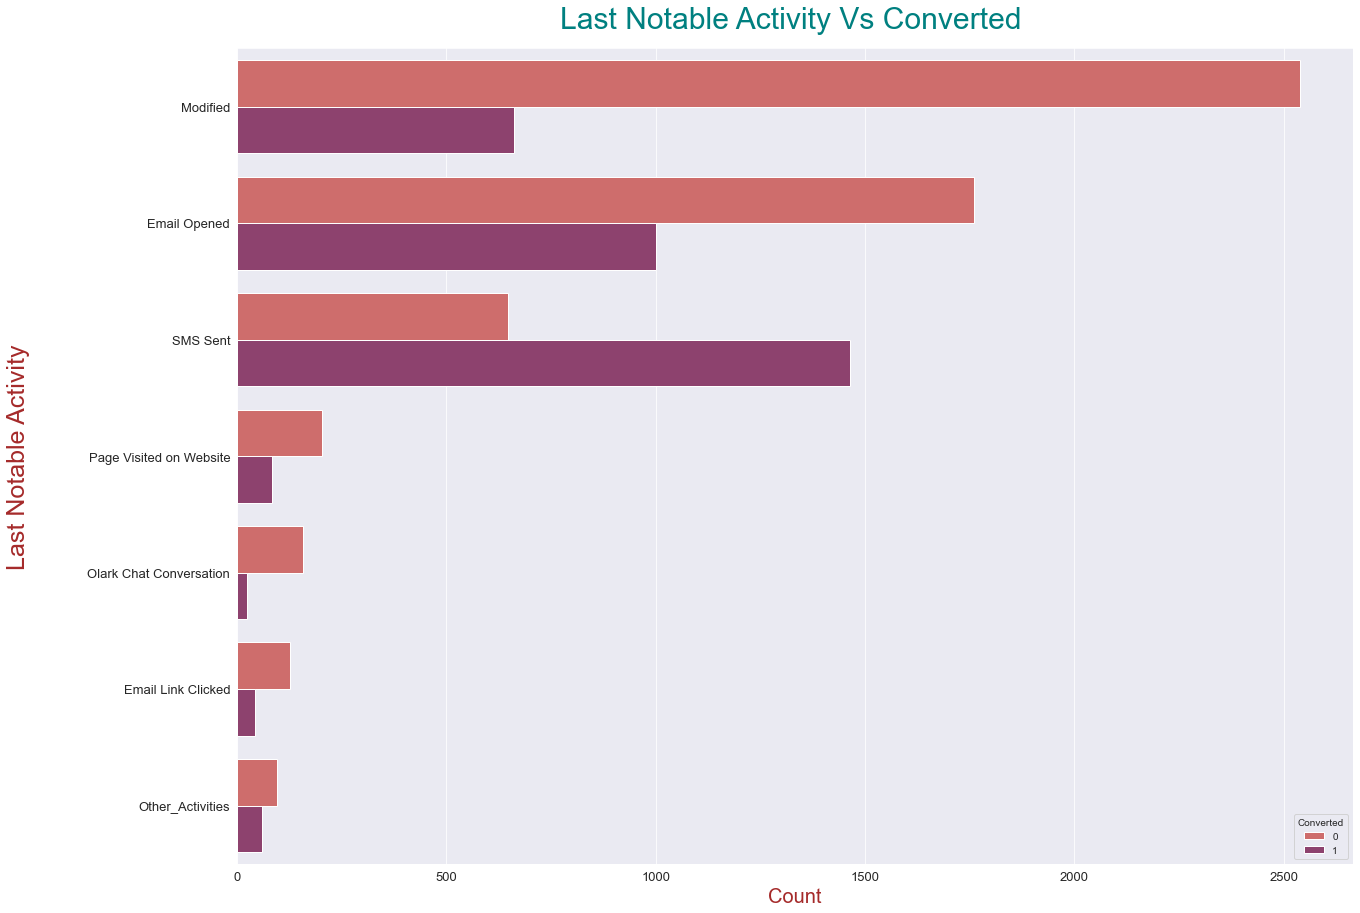

In [84]:
#Last Notable Activity Vs Converted

plt.figure(figsize=[20,15])

sns.countplot(data = leads, y= 'Last Notable Activity', order=leads['Last Notable Activity'].value_counts().index,
              hue = 'Converted',palette='flare').set_title("Last Notable Activity Vs Converted " ,
                                                                      fontsize=30, color='Teal', pad=20)


plt.ylabel("Last Notable Activity\n\n", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Count", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

plt.show()

##### **`INFERENCE`**

- The result here is very similar to that of Last Activity performed by the Lead.

In [85]:
#Checking all the columns that we are left with...

print(list(leads.columns), end="")

['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'A free copy of Mastering The Interview', 'Last Notable Activity']

In [86]:
#Checking the percentile of all the numerical values

round(leads.describe(percentiles=[0.10,0.25,0.50,0.60,0.75,0.90,0.95,0.99,0.999]),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,8863.00,8863.00,8863.00,8863.00,8863.00
mean,0.38,3.13,462.76,2.26,0.31
std,0.48,2.90,526.05,1.90,0.46
min,0.00,0.00,0.00,0.00,0.00
10%,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,3.00,1.00,0.00
50%,0.00,3.00,235.00,2.00,0.00
60%,0.00,3.00,353.00,2.50,0.00
75%,1.00,5.00,882.00,3.00,1.00
90%,1.00,7.00,1341.00,5.00,1.00


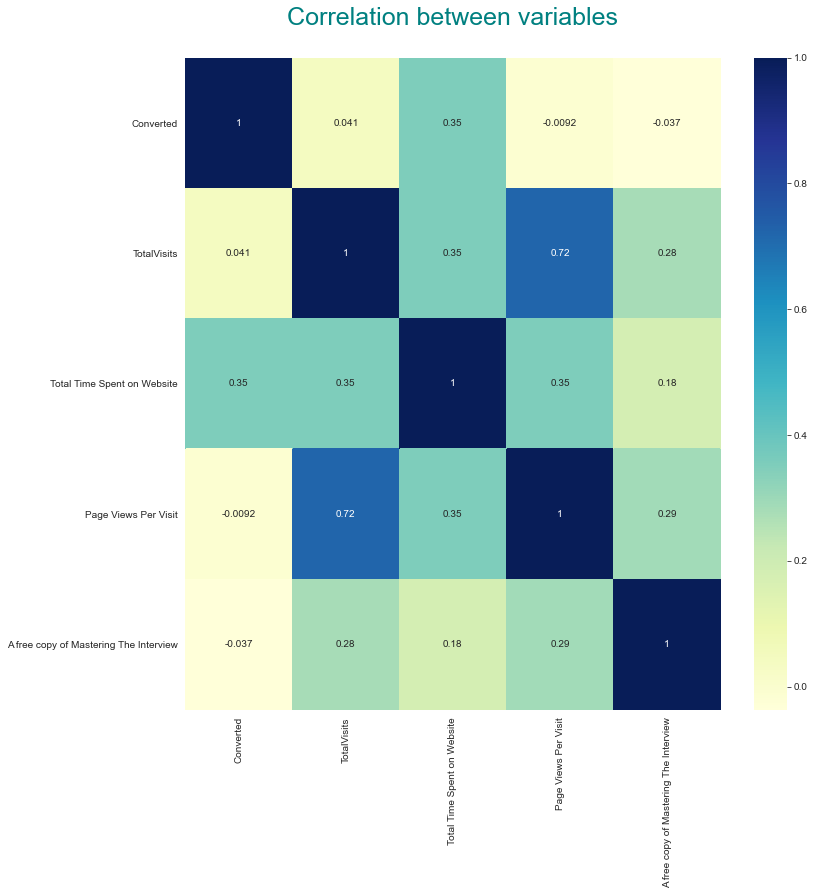

In [87]:
plt.figure(figsize=[12,12])

f=sns.heatmap(leads.corr(),cmap = "YlGnBu" , annot=True).set_title('Correlation between variables\n', fontsize = 25, color='Teal')
plt.yticks(rotation=0)
plt.show()

##### **`INFERENCE`**

- The heatmap clearly shows us that there is a strong correlation between "Page Views Per Visit" and "Total Visit" column.
- Similar positive correlations can be identified between "Total Time Spent on Website" against the "Converted" value.
- There is also a positive correlation between "Total Time Spent on Website" with both "Total Visit" and "Page Views Per Visit".

### Preparing the Dataset for Modelling

In [88]:
#Before we proceed with the modelling, we need to create dummies for the categorical columns.

#Finding all the categorical columns:

cols_to_drop = leads.select_dtypes(include=[object]).columns
cols_to_drop

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity'],
      dtype='object')

In [89]:
#Creating dummies for all the categorical columns one by one:

#For "Lead Origin", "What is your current occupation" and "City":

dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation']], drop_first=True)

leads = pd.concat([leads,dummy], axis=1)

#For "Specialization":

dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')

dummy = dummy.drop(['Specialization_Unknown'], axis = 1)

leads = pd.concat([leads, dummy], axis = 1)

#For "Lead Source":

dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')

dummy = dummy.drop(['Lead Source_Others'], axis = 1)

leads = pd.concat([leads, dummy], axis = 1)

#For "Last Activity":

dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')

dummy = dummy.drop(['Last Activity_Others'], axis = 1)

leads = pd.concat([leads, dummy], axis = 1)

#For "Tags":

dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')

dummy = dummy.drop(['Tags_Other_Reasons'], axis = 1)

leads = pd.concat([leads, dummy], axis = 1)

#For "Last Notable Activity":

dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')

dummy = dummy.drop(['Last Notable Activity_Other_Activities'], axis = 1)

leads = pd.concat([leads, dummy], axis = 1)

In [90]:
#Dropping the categorical columns:

leads.drop(columns = cols_to_drop, axis=1, inplace = True)

In [91]:
leads.info() #Checking the columns that have been created after the dummy creation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8863 non-null   int64  
 1   TotalVisits                                           8863 non-null   float64
 2   Total Time Spent on Website                           8863 non-null   int64  
 3   Page Views Per Visit                                  8863 non-null   float64
 4   A free copy of Mastering The Interview                8863 non-null   int64  
 5   Lead Origin_Landing Page Submission                   8863 non-null   uint8  
 6   Lead Origin_Lead Add Form                             8863 non-null   uint8  
 7   Lead Origin_Lead Import                               8863 non-null   uint8  
 8   What is your current occupation_Student               8863

In [92]:
#Resetting the index of the dataframe

leads.reset_index()

,index,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,3,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,4,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,9234,1,5.0,210,2.5,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8859,9236,0,2.0,238,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8860,9237,0,2.0,199,2.0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8861,9238,1,3.0,499,3.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Test Train Split

In [93]:
#Creating the X and y variables:

y = leads["Converted"]

X = leads.drop(columns=["Converted"])

In [94]:
X.head() #verifying

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [95]:
y.head() #verifying

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [96]:
#Performing the train_test_split:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 30)

In [97]:
X_train.shape #Verifying

(6204, 49)

In [98]:
X_test.shape #Verifying

(2659, 49)

### Scaling the Data

In [99]:
#Here, in this case, we are going to perform Standardization

scale = StandardScaler() #creating an object of the class

numerical_cols = X_train.select_dtypes(include = ['float64','int64']).columns #Finding the numerical columns

#Now we use the Standardization on the numerical columns:

X_train[numerical_cols] = scale.fit_transform(X_train[numerical_cols])

X_train.head() #Verifying if the scaling happened correctly

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6522,-1.076244,-0.885555,-1.196832,-0.661646,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9041,-0.390437,-0.200172,-0.133966,1.511383,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4013,-1.076244,-0.885555,-1.196832,-0.661646,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6009,-0.047533,0.775980,0.397467,1.511383,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3787,-1.076244,-0.885555,-1.196832,-0.661646,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


## Building the Logistic Regression Model

### USING RECURSIVE FEATURE ELIMINATION (RFE) 
#### TO SELECT TOP 15 PREDICTOR VARIABLES 

In [100]:
#Creating a object of the Logistic Regression class

regression_ = LogisticRegression()

#Taking the help of RFE to eliminate the less important columns:

rfe = RFE(regression_, 15)             # running RFE with 15 variables as output

rfe = rfe.fit(X_train, y_train)

In [101]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True, False, False,  True])

In [103]:
lead_rfe = pd.DataFrame({'PREDICTORS': X_train.columns, 'SELECTED ': rfe.support_, 'RANKS': rfe.ranking_})
lead_rfe.sort_values(by='RANKS')

,PREDICTORS,SELECTED,RANKS
48,Last Notable Activity_SMS Sent,True,1
28,Last Activity_Email Bounced,True,1
26,Lead Source_Welingak Website,True,1
22,Lead Source_Olark Chat,True,1
34,Last Activity_SMS Sent,True,1
35,Tags_Busy,True,1
39,Tags_Lost to EINS,True,1
40,Tags_Ringing,True,1
41,Tags_Unknown,True,1
36,Tags_Closed by Horizzon,True,1


In [104]:
#Here are the list of RFE supported columns:

cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [105]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Lin

### MODEL NUMBER - 1

In [106]:
#Building the first Logistic Regression Model:

X_train_sm = sm.add_constant(X_train[cols])

model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

result = model1.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1186.7
Date:                Mon, 12 Jul 2021   Deviance:                       2373.4
Time:                        15:32:26   Pearson chi2:                 8.28e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3863      0.219    -20.035      0.000      -4.815      -3.957
Total Time Spent on Website                  1.1269      0.064     17.514      0.000       1.001       1.253
Lead Origin_Lead Add Form                    2.9784      0.467      6.378      0.000       2.063       3.894
Lead Source_Olark Chat                       1.6172      0.155     10.423      0.000       1.313       1.921
Lead Source_Welingak Website                 2.5223      0.872      2.893      0.004       0.814       4.231
Last Activity_Email Bounced                 -1.5205      0.506     -3.007      0.003      -2.511      -0.529
Last Activity_Olark Chat Conversation       -1.0581      0.238     -4.440      0.000      -1.525      -0.591
Last Activity_SMS Sent                       1.0904      0.245      4.448      0.000       0.610       1.571
Tags_Busy                                    3.0752      0.299     10.288      0.000       2.489       3.661
Tags_Closed by Horizzon                      9.3290      1.037      8.993      0.000       7.296      11.362
Tags_Lost to EINS                            8.7035      0.761     11.441      0.000       7.213      10.195
Tags_Ringing                                -1.0127      0.309     -3.278      0.001      -1.618      -0.407
Tags_Unknown                                 2.5827      0.211     12.237      0.000       2.169       2.996
Tags_Will revert after reading the email     7.0031      0.269     26.003      0.000       6.475       7.531
Last Notable Activity_Modified              -1.0498      0.164     -6.413      0.000      -1.371      -0.729
Last Notable Activity_SMS Sent               1.1361      0.275      4.132      0.000       0.597       1.675
============================================================================================================
"""

##### **`INFERENCE`**

- From the results given by StatsModel, we can see that none of the columns have a very high P value.
- Hence, we will not drop anything here. Instead we will go ahead and find the Variance Inflation Factor to make further decisions.

In [107]:
#Checking the Variation Inflation Factor:

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,6.37
14,Last Notable Activity_SMS Sent,6.32
13,Last Notable Activity_Modified,2.12
2,Lead Source_Olark Chat,1.85
1,Lead Origin_Lead Add Form,1.80
12,Tags_Will revert after reading the email,1.73
5,Last Activity_Olark Chat Conversation,1.66
11,Tags_Unknown,1.64
0,Total Time Spent on Website,1.50
3,Lead Source_Welingak Website,1.31


##### **`INFERENCE`**

- Right off the bat, we can see that the Variation Inflation Factor of "Last Activity_SMS Sent" and "Last Notable Activity_SMS Sent". 
- This goes to show that these features have high correlation among them. 
- In this case, we will be dropping off the feature: "Last Activity_SMS Sent" and build the model again.

In [108]:
#Dropping the "Last Activity_SMS Sent" column from the list of columns from before:

cols = cols.drop('Last Activity_SMS Sent',1)

In [109]:
cols #Verifying if the column has been dropped

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### MODEL NUMBER - 2

In [110]:
#Building our second logistic regression model:

X_train_sm = sm.add_constant(X_train[cols])

model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

result = model2.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1196.3
Date:                Mon, 12 Jul 2021   Deviance:                       2392.6
Time:                        15:32:27   Pearson chi2:                 8.50e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3841      0.218    -20.133      0.000      -4.811      -3.957
Total Time Spent on Website                  1.1248      0.064     17.500      0.000       0.999       1.251
Lead Origin_Lead Add Form                    3.0066      0.459      6.550      0.000       2.107       3.906
Lead Source_Olark Chat                       1.5997      0.154     10.357      0.000       1.297       1.902
Lead Source_Welingak Website                 2.6224      0.870      3.015      0.003       0.918       4.327
Last Activity_Email Bounced                 -1.7582      0.498     -3.531      0.000      -2.734      -0.782
Last Activity_Olark Chat Conversation       -1.2890      0.232     -5.560      0.000      -1.743      -0.835
Tags_Busy                                    3.1471      0.299     10.527      0.000       2.561       3.733
Tags_Closed by Horizzon                      9.1264      1.033      8.831      0.000       7.101      11.152
Tags_Lost to EINS                            8.6147      0.758     11.363      0.000       7.129      10.101
Tags_Ringing                                -0.9941      0.309     -3.220      0.001      -1.599      -0.389
Tags_Unknown                                 2.6034      0.210     12.390      0.000       2.192       3.015
Tags_Will revert after reading the email     6.9711      0.266     26.158      0.000       6.449       7.493
Last Notable Activity_Modified              -0.7132      0.139     -5.135      0.000      -0.985      -0.441
Last Notable Activity_SMS Sent               2.2050      0.137     16.090      0.000       1.936       2.474
============================================================================================================
"""

In [111]:
#Since there are no high P values, we will go ahead and find the VIF:

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.85
1,Lead Origin_Lead Add Form,1.80
12,Last Notable Activity_Modified,1.77
11,Tags_Will revert after reading the email,1.72
10,Tags_Unknown,1.63
13,Last Notable Activity_SMS Sent,1.62
5,Last Activity_Olark Chat Conversation,1.57
0,Total Time Spent on Website,1.50
3,Lead Source_Welingak Website,1.30
7,Tags_Closed by Horizzon,1.24


##### **`INFERENCE`**

- After building the second model, we can see that the all the Variation Inflation Factors are now sensible.
- We will use this model to derive our probabilities etc on the Training dataset.

In [112]:
#Predicting on the training dataset:

y_train_pred = result.predict(X_train_sm)

y_train_pred.head(10)

6522    0.008371
9041    0.118586
4013    0.993676
6009    0.996371
3787    0.025372
3724    0.072313
684     0.269928
780     0.985992
4076    0.096101
3098    0.838835
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1) #Reshaping the data

In [114]:
#Now it is time to compare the Actual Converted with that of the Predicted Conversion.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.008371,6522
1,0,0.118586,9041
2,1,0.993676,4013
3,1,0.996371,6009
4,0,0.025372,3787


##### **`INFERENCE`**

- What we get to see here is that, the higher the value, the more likely the Lead is going to get converted.

In [115]:
# Now we are going to take an arbitrary number 
# If the converted probability is higher than this number, the Lead is converted else not.

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.008371,6522,0
1,0,0.118586,9041,0
2,1,0.993676,4013,1
3,1,0.996371,6009,1
4,0,0.025372,3787,0


### Evaluating the Model

In [116]:
#Checking the Confusion Matrix of this Logistic Regression Model:
 
con_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )

print(con_matrix)

[[3703  155]
 [ 292 2054]]


In [117]:
#Checking the Accuracy of the model

acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

print("Accuracy in the model is: " + str(round(acc,2)))

Accuracy in the model is: 0.93


In [118]:
#Finding: true positive, true negatives, false positives, false negatives

TP = con_matrix[1,1] 
TN = con_matrix[0,0] 
FP = con_matrix[0,1] 
FN = con_matrix[1,0] 

In [119]:
# Checking the sensitivity of the model:

round(TP / float(TP+FN),2)

0.88

In [120]:
# Checking the specificity of the model:

round(TN / float(TN+FP),2)

0.96

In [121]:
# Checking the False positive rates of the model:

round(FP/ float(TN+FP),2)

0.04

In [122]:
# Calculating Positive Predictive value of the model:

round (TP / float(TP+FP),2)

0.93

In [123]:
# Calculating the Negative predictive value of the model:

round (TN / float(TN+ FN),2)

0.93

In [124]:
#Now to check the ROC curve:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('\nFalse Positive Rate or [1 - True Negative Rate]', size = 13, color = "Brown")
    plt.ylabel('True Positive Rate\n', size = 13, color = "Brown")
    plt.title('Receiver operating characteristic example', size = 20, pad = 20, color = "Teal")
    plt.xticks(size = 13)
    plt.yticks(size = 13)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

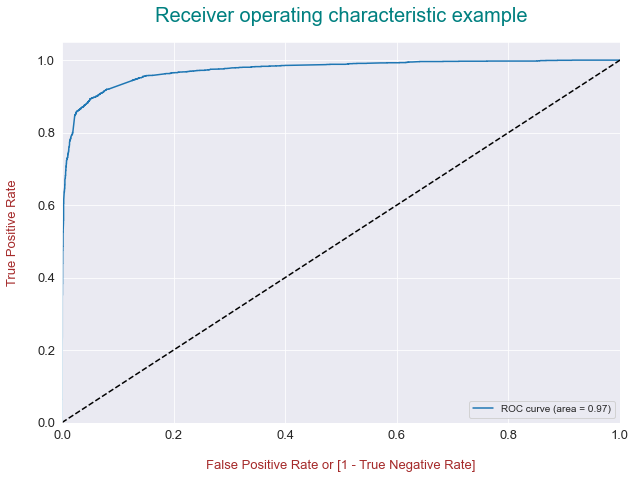

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### **`INFERENCE`**

- From the ROC curve, we can see that the area under the curve is very high (0.97).
- A high area under the curve indicates that the model is very good.

### Finding the best Cut-Off

In [127]:
#Finding the different probability cut-offs:

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.008371,6522,0,1,0,0,0,0,0,0,0,0,0
1,0,0.118586,9041,0,1,1,0,0,0,0,0,0,0,0
2,1,0.993676,4013,1,1,1,1,1,1,1,1,1,1,1
3,1,0.996371,6009,1,1,1,1,1,1,1,1,1,1,1
4,0,0.025372,3787,0,1,0,0,0,0,0,0,0,0,0


- But with this chart alone, we cannot decide.
- A better way to decide will be to create a graph and plot- accuracy sensitivity and specificity for different probabilities.

In [128]:
# Calculating the accuracy sensitivity and specificity for various probability cutoffs.
cutoff = pd.DataFrame( columns = ['Prob','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff)

     Prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.378143     1.000000     0.000000
0.1   0.1  0.849936     0.967604     0.778383
0.2   0.2  0.897163     0.947997     0.866252
0.3   0.3  0.921180     0.910912     0.927424
0.4   0.4  0.926177     0.895993     0.944531
0.5   0.5  0.927950     0.875533     0.959824
0.6   0.6  0.930206     0.858909     0.973561
0.7   0.7  0.926177     0.841432     0.977709
0.8   0.8  0.908124     0.781756     0.984966
0.9   0.9  0.887492     0.715686     0.991965


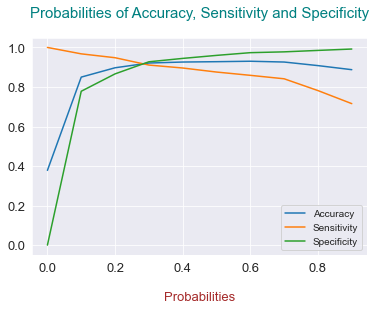

In [168]:
# Visualizing the graph:

cutoff.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.xlabel('\nProbabilities', size = 13, color = "Brown")
plt.title('Probabilities of Accuracy, Sensitivity and Specificity', size = 15, pad = 20, color = "Teal")
plt.xticks(size = 13)
plt.yticks(size = 13)

plt.show()

##### **`INFERENCE`**

- From the above graph, we can make out that the optimal cut-off for our model will be 0.28.
- This is the point where the sensitivity, accuracy and specificity co-exist.

In [130]:
#Finding the final predicted

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.008371,6522,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.118586,9041,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.993676,4013,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.996371,6009,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.025372,3787,0,1,0,0,0,0,0,0,0,0,0,0


In [131]:
# Checking the final confusion matrix:

con_matrix1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
print(con_matrix1)

[[3570  288]
 [ 206 2140]]


In [132]:
# Accuracy of the model after selecting optimal cut-off.

round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted),2)

0.92

In [133]:
# Sensitivity of the model after selecting the optimal cut-off.

round(TP / float(TP+FN),2)

0.88

In [134]:
# Specificity of the model after selecting the optimal cut-off.

round(TN / float(TN+FP),2)

0.96

##### **`INFERENCE`**

- We have seen that our model is producing a ROC curve with AUC of 0.97.
- This is really good. The higher the value, the better the model.
- Also, the Accuracy, Sensitivity and Specificity of the model are 92%, 88% and 96% respectively. 

In [135]:
# Calculating the Precision:

TP / TP + FP

round(con_matrix1[1,1]/(con_matrix1[0,1]+con_matrix1[1,1]),2)

0.88

In [136]:
# Calculating the Recall:

TP / TP + FN

round(con_matrix1[1,1]/(con_matrix1[1,0]+con_matrix1[1,1]),2)

0.91

In [137]:
#Finding the precision_score:

round(precision_score(y_train_pred_final.Converted , y_train_pred_final.Final_Predicted),2)

0.88

In [138]:
#Finding the recall_score:

round(recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted),2)

0.91

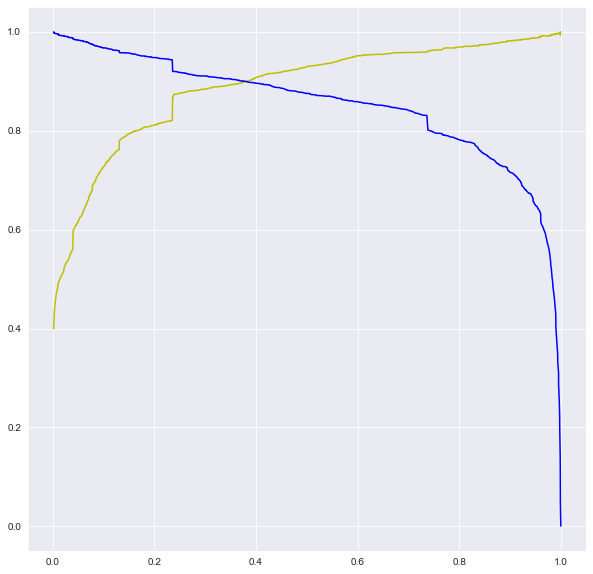

In [161]:
#Creating the Recall Curve:
plt.figure(figsize=[10,10])

y_train_pred_final.Converted, y_train_pred_final.Final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "y-")
plt.plot(thresholds, r[:-1], "b-")
plt.show()

### Preparing the Test Set

In [140]:
#Scaling the Test Set:

numeric_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[numeric_cols] = scale.transform(X_test[numeric_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5916,-1.076244,-0.885555,-1.196832,-0.661646,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3096,-1.076244,-0.885555,-1.196832,-0.661646,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2619,1.324081,-0.473948,0.663184,-0.661646,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7334,-0.390437,0.978007,-0.665399,-0.661646,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1354,-1.076244,-0.885555,-1.196832,-0.661646,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


### Prediction on Testing Dataset

In [141]:
# Adding a constant since we are using StatsModel
X_test = X_test[cols]

X_test_sm = sm.add_constant(X_test)

y_test_pred = result.predict(X_test_sm)

In [142]:
y_test_pred.head(10)

5916    0.235580
3096    0.131218
2619    0.046221
7334    0.975564
1354    0.945431
5590    0.028459
874     0.986623
3625    0.974426
472     0.985874
5583    0.001900
dtype: float64

In [143]:
y_pred_ = pd.DataFrame(y_test_pred)

In [144]:
y_pred_.head()

,0
5916,0.235580
3096,0.131218
2619,0.046221
7334,0.975564
1354,0.945431


In [145]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [146]:
# Making Prospect ID as the index:

y_test_df['Prospect ID'] = y_test_df.index

In [147]:
# Removing index for both dataframes:

y_pred_.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_],axis=1)

In [149]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,5916,0.235580
1,0,3096,0.131218
2,0,2619,0.046221
3,1,7334,0.975564
4,1,1354,0.945431


In [150]:
# Renaming the column:

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})

y_pred_final.head()

,Converted,Prospect ID,Converted_probability
0,1,5916,0.235580
1,0,3096,0.131218
2,0,2619,0.046221
3,1,7334,0.975564
4,1,1354,0.945431


In [151]:
# Arranging the cols:

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_probability']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_probability.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_probability,Lead_Score
0,5916,1,0.235580,24
1,3096,0,0.131218,13
2,2619,0,0.046221,5
3,7334,1,0.975564,98
4,1354,1,0.945431,95


In [152]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.28 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_probability,Lead_Score,Final_Predicted
0,5916,1,0.235580,24,0
1,3096,0,0.131218,13,0
2,2619,0,0.046221,5,0
3,7334,1,0.975564,98,1
4,1354,1,0.945431,95,1


In [153]:
# Checking the confusion Matrix:

con_mat_pred = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
print(con_mat_pred)

[[1543  127]
 [  69  920]]


In [154]:
#Checking the Accuracy on the Test Dataset of the model:

round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted),2)

0.93

In [155]:
#Checking the Sensitivity on the Test Dataset of the model:

TP = con_mat_pred[1,1] 
TN = con_mat_pred[0,0] 
FP = con_mat_pred[0,1] 
FN = con_mat_pred[1,0] 


round(TP / float(TP+FN),2)

0.93

In [156]:
#Checking the Specificity on the Test Dataset of the model:

round(TN / float(TN+FP),2)

0.92

In [157]:
#Finding the precision_score on the Test Dataset:

round(precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted),2)

0.88

In [158]:
#Finding the recall_score on the Test Dataset:

round(recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted),2)

0.93

##### **`INFERENCE ON THE TRAIN DATASET`**

- When the Logistic Regression was applied to the Test dataset, we can see that the Accuracy, Sensitivity and Specificity are 92%, 88% and 96% respectively.
- The precision score is 88%.
- The recall score is 91%.

##### **`INFERENCE ON THE TEST DATASET`**

- When the Logistic Regression was applied to the Test dataset, we can see that the Accuracy, Sensitivity and Specificity are 93%, 93% and 92% respectively.
- The precision score is 88%.
- The recall score is 93%.



- The model is doing a great job in prediction! 
- This model can hence, be used, to make sound business descisions.

# CONCLUSION:

#### FINAL MODEL EQUATION

**`Probability of conversion = -4.3841 + ( 1.1248 * Total Time Spent on Website ) + ( 3.0066 * Lead Origin_Lead Add Form ) + ( 1.5997 * Lead Source_Olark Chat ) + ( 2.6224 * Lead Source_Welingak Website ) + ( -1.7582 * Last Activity_Email Bounced) + ( -1.2890 * Last Activity_Olark Chat Conversation ) + ( 3.1471 * Tags_Busy ) + ( 9.1264 * Tags_Closed by Horizzon ) + ( 8.6147 * Tags_Lost to EINS ) + ( -0.9941 * Tags_Ringing ) + ( 2.6034 * Tags_Unknown ) + ( 6.9711 * Tags_Will revert after reading the email ) + ( -0.7132 * Last Notable Activity_Modified ) + ( 2.2050 * Last Notable Activity_SMS Sent )`**

 - **Tags_Closed by Horizzon has the highest coefficient of 9.1264**, which means keeping other variable constant an unit increase results in 9.1264 unit increase in Probability of conversion.
 - **Tags_Closed by Horizzon**, **Tags_Lost to EINS** and **Tags_Will revert after reading the email** are the **top 3 variables** having strong coefficients.
 - Last Activity_Olark Chat Conversation, Tags_Ringing and Last Notable Activity_Modified have **negative coeeficient**, which means increase in values of these variables would result in decrease in value of Probability of conversion.
 - Probability of conversion increases if Tags_Busy, Lead Origin_Lead Add Form, Lead Source_Welingak Website, Tags_Unknown, Last Notable Activity_SMS Sent, Lead Source_Olark Chat, Total Time Spent on Website increases as these variables have **positive coefficients**.
 - **Constant value** - when all other variables are zero the Probability of conversion value will still be **-4.3841**


 - Comparing Precision, Recall and other metrics value for both train and test. Our model performs well on test set as well.
 - This model explains how exactly the Probability of conversion vary with different features. The management can accordingly manipulate the business strategy to meet the conversion target and meet the business expectations.
 - In business terms, this model can be deployed in the upcoming future to meet the X education's requirements.
 - Focusing on the features of the model will increase their chances of contacting most of the potential buyers for the course.
 - The Marketting team and evaluate the leads based on the top 3 variables and make sound business decisions.
 - The Marketting team can also chase after leads, who spend longer time on their website, orginate from Add form.
 - The team can also come with interesting courses and offers that attract people with specialization in banking, investment and insurance.
 - They can also keep a close watch on Leads originating from Olark Chat.